In [70]:
import pandas as pd
from tensorflow.keras.models import load_model
import tensorflow_hub as hub
import tensorflow as tf
import pathlib
import cv2


In [71]:
from string import ascii_lowercase as alc

ASL_map = {}
for i in range(0, 26):
    ASL_map[i] = alc[i]
ASL_map[26] = 'del'
ASL_map[27] = 'nothing'
ASL_map[28] = 'space'
ASL_map


{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: 'del',
 27: 'nothing',
 28: 'space'}

In [72]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [73]:
model_Efficientnet = load_model('/content/gdrive/MyDrive/CMPE255_ASL_PROJECT/Efficientnet_model.h5', custom_objects={'KerasLayer':hub.KerasLayer})


In [74]:
model_Efficientnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Efficientnet_b0 (KerasLayer  (None, 1000)             5330564   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 Output_layer (Dense)        (None, 29)                29029     
                                                                 
Total params: 5,359,593
Trainable params: 29,029
Non-trainable params: 5,330,564
_________________________________________________________________


In [75]:
from PIL import Image
# Opens a image in RGB mode
im = Image.open("/content/A_test.jpg")
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size

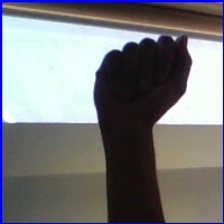

In [76]:
newsize = (224, 224)
im1 = im.resize(newsize)
# Shows the image in image viewer
display(im1)

In [99]:
import numpy as np
from google.colab.patches import cv2_imshow
def prepare(filepath):
    image = cv2.imread(filepath)
    image = cv2.resize(image, (224,224))
   # image.reshape(-1, 224, 224, 3)
    cv2_imshow(image)
    image = image[np.newaxis, :,  :, :]
    return image.astype('float32')/255.0


In [78]:
a=model_Efficientnet.predict(prepare('/content/A_test.jpg'))
type(a)

1/1 [==============================] - 1s 800ms/step


numpy.ndarray

In [79]:
a

array([[3.1968202e-02, 1.5800484e-07, 4.0096099e-12, 9.5725251e-12,
        9.6595144e-01, 6.0871952e-09, 2.7367142e-10, 3.2188509e-16,
        2.0378118e-07, 1.7984416e-09, 7.6244028e-12, 1.3173167e-10,
        4.8289248e-09, 1.7019296e-11, 6.6009459e-10, 2.3007063e-17,
        1.3543889e-18, 2.9367545e-10, 2.0149741e-03, 6.1318613e-05,
        4.8100547e-12, 2.6862535e-11, 2.1765758e-12, 4.7404006e-07,
        3.0187126e-09, 3.2366811e-06, 1.4802466e-13, 1.4624703e-14,
        8.7039170e-13]], dtype=float32)

In [86]:
def get_top_x(index, x):
  result = sorted(range(len(index[0])), key=lambda i: index[0][i])
  result.reverse()

  for i in result[:x]:
    print(ASL_map[i])
  print()
  print()

In [91]:
!unzip -q /content/ASL_testing_new.zip

In [92]:
f = '/content/ASL_testing_new'
import os


In [93]:
def pass_folder(folder):
  for file in os.listdir(folder):
    f = os.path.join(folder, file)
    print(f)
    get_top_x(model_Efficientnet.predict(prepare(f)), 3)
    


/content/ASL_testing_new/B_test_mess.jpg


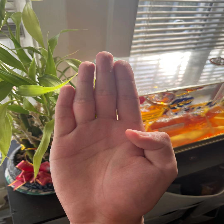

1/1 [==============================] - 0s 118ms/step
g
i
t


/content/ASL_testing_new/I_test.jpg


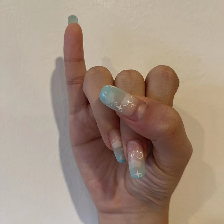

1/1 [==============================] - 0s 95ms/step
i
t
space


/content/ASL_testing_new/K_test.jpg


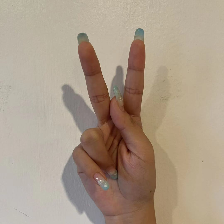

1/1 [==============================] - 0s 109ms/step
u
l
h


/content/ASL_testing_new/L_test.jpg


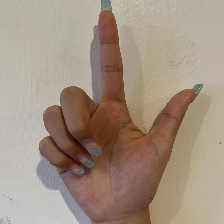

1/1 [==============================] - 0s 98ms/step
u
l
i


/content/ASL_testing_new/G_test.jpg


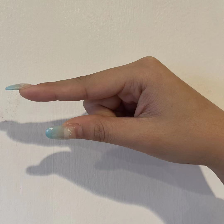

1/1 [==============================] - 0s 100ms/step
p
j
q


/content/ASL_testing_new/C_test.jpg


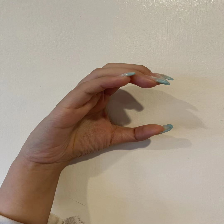

1/1 [==============================] - 0s 94ms/step
q
c
t


/content/ASL_testing_new/F_test.jpg


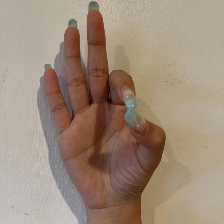

1/1 [==============================] - 0s 98ms/step
u
x
v


/content/ASL_testing_new/A_test_wood.jpg


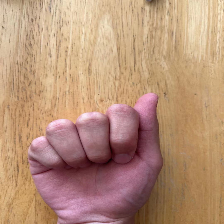

1/1 [==============================] - 0s 94ms/step
z
t
e


/content/ASL_testing_new/V_test.jpg


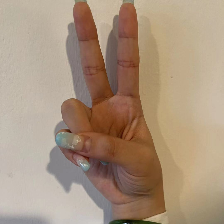

1/1 [==============================] - 0s 94ms/step
i
h
t


/content/ASL_testing_new/Y_test.jpg


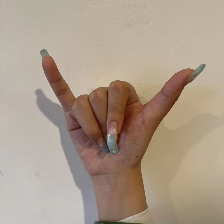

1/1 [==============================] - 0s 96ms/step
w
j
v


/content/ASL_testing_new/B_test_white.jpg


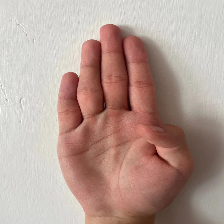

1/1 [==============================] - 0s 112ms/step
z
h
g


/content/ASL_testing_new/P_test.jpg


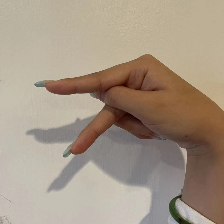

1/1 [==============================] - 0s 97ms/step
p
q
j


/content/ASL_testing_new/A_test_mess.jpg


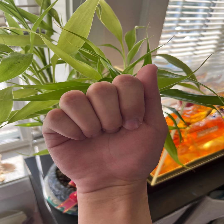

1/1 [==============================] - 0s 88ms/step
g
t
x


/content/ASL_testing_new/M_test.jpg


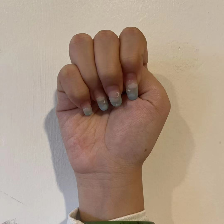

1/1 [==============================] - 0s 101ms/step
i
s
e


/content/ASL_testing_new/T_test.jpg


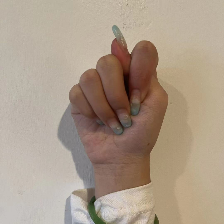

1/1 [==============================] - 0s 101ms/step
i
l
u


/content/ASL_testing_new/B_test_female.jpg


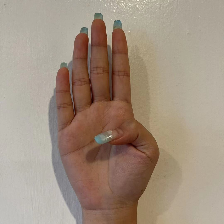

1/1 [==============================] - 0s 117ms/step
u
w
b


/content/ASL_testing_new/A_test_white_male.jpg


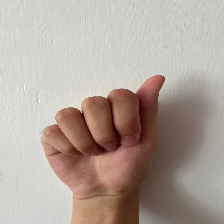

1/1 [==============================] - 0s 99ms/step
z
a
g


/content/ASL_testing_new/E_test.jpg


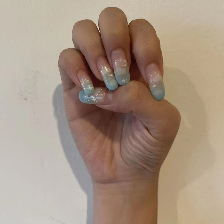

1/1 [==============================] - 0s 98ms/step
i
t
j


/content/ASL_testing_new/Z_test.jpg


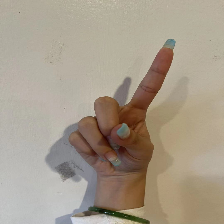

1/1 [==============================] - 0s 100ms/step
l
u
g


/content/ASL_testing_new/N_test.jpg


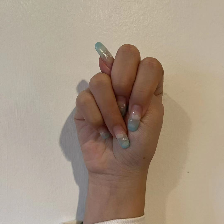

1/1 [==============================] - 0s 110ms/step
t
u
n


/content/ASL_testing_new/S_test.jpg


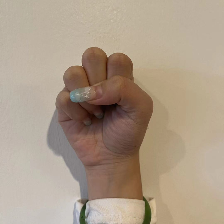

1/1 [==============================] - 0s 103ms/step
i
u
h


/content/ASL_testing_new/Q_test.jpg


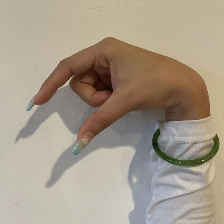

1/1 [==============================] - 0s 107ms/step
q
g
l


/content/ASL_testing_new/H_test.jpg


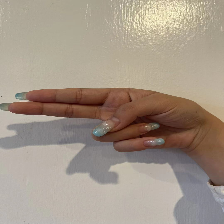

1/1 [==============================] - 0s 92ms/step
y
j
h


/content/ASL_testing_new/O_test.jpg


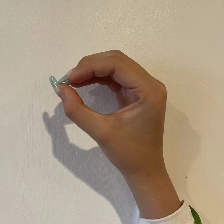

1/1 [==============================] - 0s 105ms/step
o
space
z


/content/ASL_testing_new/J_test.jpg


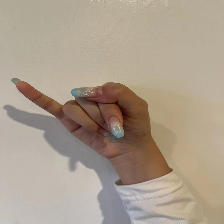

1/1 [==============================] - 0s 100ms/step
h
t
p


/content/ASL_testing_new/D_test.jpg


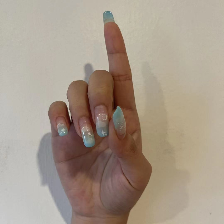

1/1 [==============================] - 0s 97ms/step
i
t
l


/content/ASL_testing_new/U_test.jpg


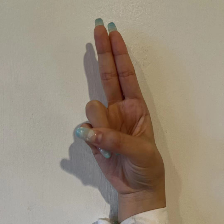

1/1 [==============================] - 0s 111ms/step
h
u
g


/content/ASL_testing_new/A_test_white_female.jpg


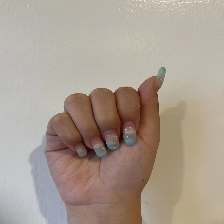

1/1 [==============================] - 0s 100ms/step
t
a
m


/content/ASL_testing_new/W_test.jpg


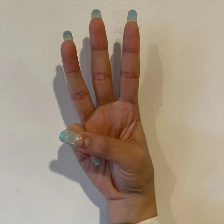

1/1 [==============================] - 0s 97ms/step
w
u
i


/content/ASL_testing_new/X_test.jpg


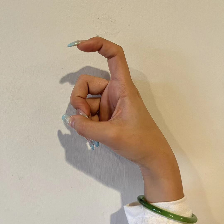

1/1 [==============================] - 0s 131ms/step
p
t
s




In [100]:
pass_folder(f)